# Gráfico de Área
### Combina el gráfico de líneas con el gráfico de barras. Es decir, me permite comparar diferencias de *magnitudes* y hallar *tendencias* al mismo tiempo.

In [1]:
import pandas as pd
import plotly.express as px

array([<Axes: xlabel='mes'>, <Axes: xlabel='mes'>, <Axes: xlabel='mes'>],
      dtype=object)

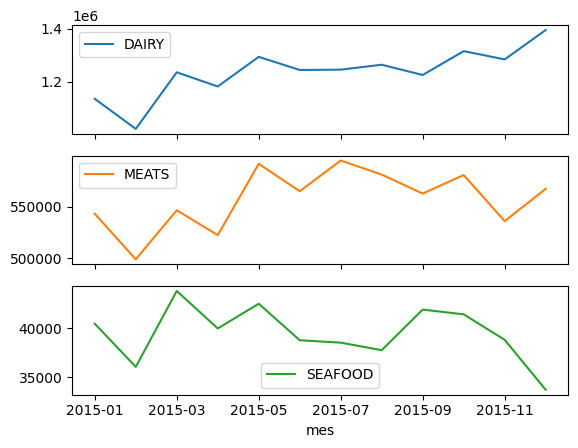

In [2]:
df = pd.read_csv('tienda_ventas.csv', index_col='id')
df['mes'] = df['date'].apply(lambda x: x [:7])
por_mes = df.groupby('mes').agg({
    'sales': 'sum'
})
fig = px.line(
    por_mes,
    x=por_mes.index.values,
    y='sales'
)
df['anio'] = df['date'].apply(lambda x: x[:4])
df_2015 = df[
    (df['anio'] == '2015') &
    (df['family'].isin(['SEAFOOD','MEATS','DAIRY']))
]
agrupacion = df_2015.groupby(['mes','family']).agg({
    'sales': 'sum'
})
pivotado = agrupacion.reset_index(1).pivot(columns='family').droplevel(0, axis='columns') 
pivotado.plot.line(
    subplots=True
)

<Axes: xlabel='mes'>

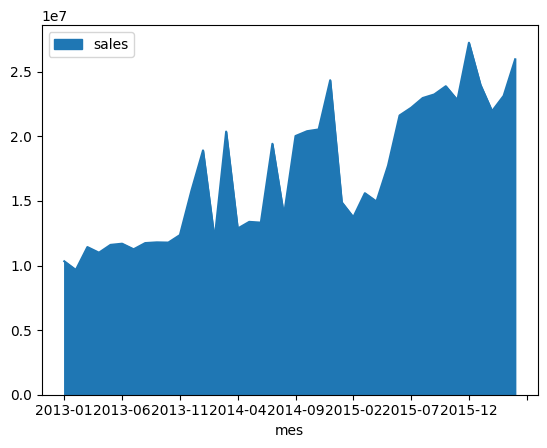

In [3]:
por_mes.plot.area(
    y='sales'
)

### Gráfico de Areas Apiladas
### Apila las áreas de diferentes grupos una encima de la otra, SUMANDO sus magnitudes.

### TRADEOFF: Pierdo precisión al momento de intentar saber la **magnitud** exacta de la variable en el eje Y de mis grupos individuales. Pero gano poder comparar **proporcionalmente** las diferentes áreas que representan los grupos.

<Axes: xlabel='mes'>

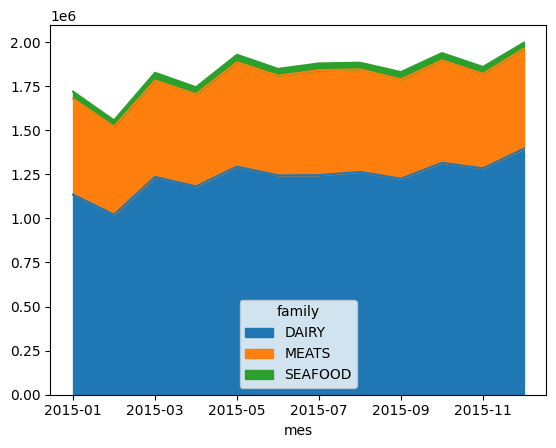

In [4]:
pivotado.plot.area(
    stacked=True
)

### Gráfico de Areas Agrupadas
### Es un gráfico multilínea que pinta el área bajo la curva de cada línea. No suma las magnitudes. Simplemente pinta debajo de las líneas.

<Axes: xlabel='mes'>

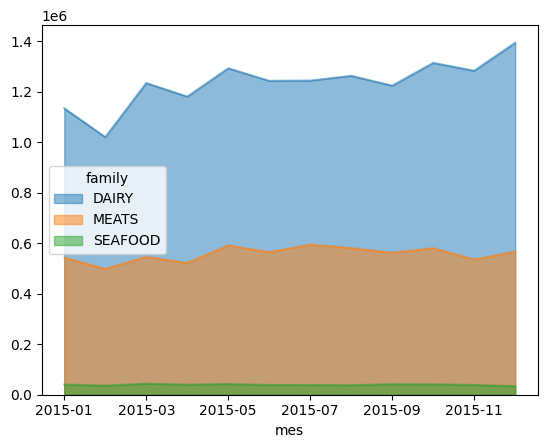

In [5]:
pivotado.plot.area(
    stacked=False
)